<a href="https://colab.research.google.com/github/ele-ammar/BusinessCardApplication/blob/main/TP1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP1: Chargement et exploration des données

🎯 **Objectif du TP**

L’objectif de ce TP est de :
1. Comprendre comment charger un dataset réel (format CSV).

2. Explorer les données pour identifier leurs caractéristiques (taille, types de variables, valeurs manquantes).

3. Réaliser un nettoyage et prétraitement des données.

4. Découvrir quelques techniques d’analyse exploratoire : visualisations, corrélations, détection d’anomalies.

5. Préparer les données pour un futur modèle de Machine Learning (par exemple une régression linéaire).

📊 **Description des données**

Le dataset utilisé est **California Housing Dataset** (source : recensement des USA, années 1990).

Chaque ligne représente un district en Californie, avec les variables suivantes :

* longitude, latitude → coordonnées géographiques.

* housing_median_age → âge médian des habitations.

* total_rooms → nombre total de pièces.

* total_bedrooms → nombre total de chambres.

* population → nombre d’habitants.

* households → nombre de foyers.

* median_income → revenu médian.

* median_house_value → valeur médiane des maisons (variable cible).

* ocean_proximity → proximité avec l’océan (catégorielle : "NEAR BAY", "INLAND", etc.).

### 1. Importation des bibliothèques

📦 **Présentation des bibliothèques utilisées**

* pandas : manipulation des tableaux de données (DataFrame).

* numpy : calculs numériques efficaces (vecteurs, matrices).

* matplotlib : visualisation de graphiques basiques.

* seaborn : visualisations statistiques avancées (histogrammes, heatmaps).

* scikit-learn (sklearn) : préparation des données et modèles ML (normalisation, encodage, régression, etc.).

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Chargement des données

In [2]:
# -----------------------------
# 1. Chargement des données
# -----------------------------
# Exemple : un dataset CSV (prix maisons)
# Si tu n’as pas le fichier, tu peux utiliser un dataset en ligne
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

In [ ]:
# Afficher les 5 premières lignes
print("Aperçu des données :")
print(data.head())

Aperçu des données :
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### 3. Informations générales

In [ ]:
# Dimensions du dataset
print("\nNombre de lignes et colonnes :", data.shape)

# Types de variables
print("\nTypes de données :")
print(data.dtypes)





Nombre de lignes et colonnes : (20640, 10)

Types de données :
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# Structure du Dataset
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
#nombre de lignes
len(data)

In [ ]:
data.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [ ]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [ ]:
data.tail(10)

### 4. Statistiques descriptives

In [ ]:
print("\nStatistiques descriptives :")
print(data.describe())


Statistiques descriptives :
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.4

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


### 5. Visualisation simple

In [ ]:
data['housing_median_age']

,housing_median_age
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [ ]:
data['housing_median_age']

,housing_median_age
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [ ]:
data['housing_median_age'].max()

52.0

In [ ]:
data['housing_median_age'].sort_values() #(data['housing_median_age'].sort_values(ascending=True))

,housing_median_age
12286,1.0
19536,1.0
3130,1.0
18972,1.0
12285,2.0
...,...
31,52.0
2,52.0
3,52.0
4,52.0


In [ ]:
data['housing_median_age'].sort_values(ascending=True).tail(10)

,housing_median_age
22,52.0
23,52.0
24,52.0
27,52.0
29,52.0
31,52.0
2,52.0
3,52.0
4,52.0
16,52.0


In [ ]:
data['housing_median_age'].sort_values(ascending=False)

### 6. Creation d'un nouveau attribut

In [ ]:
# Ex : densité de population (population / households)
data["population_per_household"] = data["population"] / data["households"]

# Ex : taille moyenne des pièces (total_rooms / households)
data["rooms_per_household"] = data["total_rooms"] / data["households"]

print(data.head())


In [ ]:
# Valeurs manquantes
print("\nValeurs manquantes :")
print(data.isnull().sum())

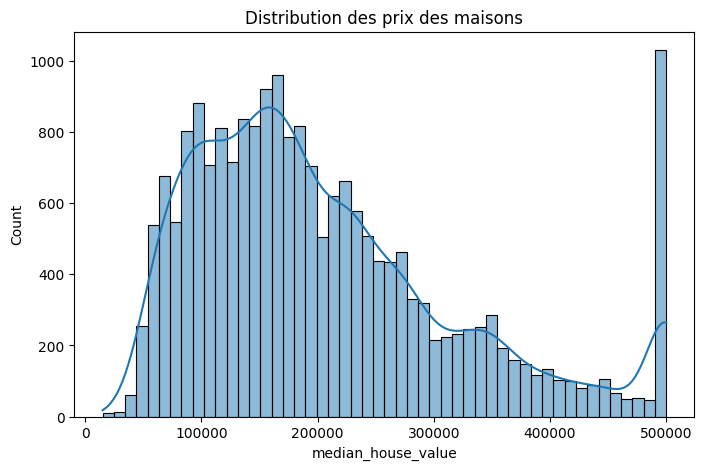

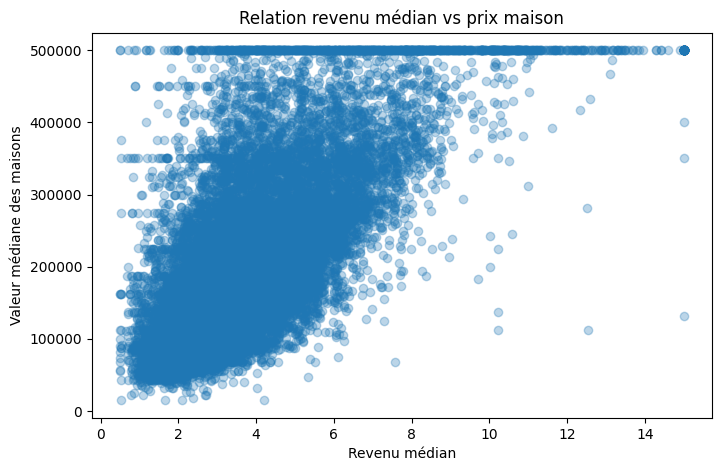

In [ ]:
# Distribution d'une variable continue (median_house_value)
plt.figure(figsize=(8,5))
sns.histplot(data["median_house_value"], bins=50, kde=True)
plt.title("Distribution des prix des maisons")
plt.show()

# Relation entre surface et prix
plt.figure(figsize=(8,5))
plt.scatter(data["median_income"], data["median_house_value"], alpha=0.3)
plt.xlabel("Revenu médian")
plt.ylabel("Valeur médiane des maisons")
plt.title("Relation revenu médian vs prix maison")
plt.show()


### 6.Nettoyage et traitement des données

In [ ]:
# Remplir les valeurs manquantes (par la médiane)
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

# Encodage des variables catégorielles (ocean_proximity)
data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)

# Normalisation de certaines variables (optionnel)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[["median_income", "housing_median_age"]] = scaler.fit_transform(data[["median_income", "housing_median_age"]])

print("\nAperçu des données après traitement :")
print(data.head())
